In [1]:
import torch
from kbgen.data.datasets import NuCLR
from kbgen.config import defaults_customLM as cfg
from kbgen.utils.log import RunTracker
from matplotlib import pyplot as plt


dataset = NuCLR.from_config(cfg)
run = RunTracker.from_logdir(name="09-15-16-29-49nuclr-fp32-lBGyH_L2td4_te4_d1024nuclr")

processed data found, loading...
done


In [2]:
run.model.mask_embedding.weight

Parameter containing:
tensor([[ 0.3116,  0.0123,  0.1907,  ..., -0.3211, -1.3072, -0.5959],
        [-0.1289,  0.4816, -1.7814,  ..., -1.8989, -0.2647,  0.4347],
        [-0.7261,  1.3657, -0.5198,  ..., -0.8896, -0.4576, -1.5321],
        ...,
        [-0.9197, -0.0696,  0.8080,  ..., -0.7067,  1.0275, -1.7535],
        [-0.0967, -0.8063,  0.0554,  ..., -0.1089, -1.4680,  0.3056],
        [ 0.0210, -0.0108,  0.5884,  ...,  0.1196,  0.7474, -1.7703]],
       requires_grad=True)

In [3]:
def rmse(preds, tgts):
    return torch.sqrt(torch.mean((preds - tgts) ** 2))

def eval_model(preds, tgts):
    eval_results = {}
    transformed_preds = dataset.reverse_transform(preds)
    transformed_targets = dataset.reverse_transform(tgts)
    for field in dataset.fields["numerical"]:
        pred = transformed_preds[field].view(-1)
        tgt = transformed_targets[field].view(-1)
        mask = tgts[field] != dataset.numerical_pad_token_id
        pred = pred[mask]
        tgt = tgt[mask]
        if "binding" in field:
            n = transformed_targets["n"].view(-1)[mask]
            z = transformed_targets["z"].view(-1)[mask]
            pred = pred * (n + z)
            tgt = tgt * (n + z)
        rms = rmse(pred, tgt)
        eval_results[field] = rms
    return eval_results

In [4]:
model = run.load_latest_model()

Loading model from: /export/d0/kitouni/kbgen-logdir/models/09-15-16-29-49nuclr-fp32-lBGyH_L2td4_te4_d1024nuclr/999.pt


RuntimeError: Error(s) in loading state_dict for KBFormer:
	Missing key(s) in state_dict: "encoder_dict.z.embedding.embedding.projection.weight", "encoder_dict.z.embedding.embedding.projection.bias", "encoder_dict.n.embedding.embedding.projection.weight", "encoder_dict.n.embedding.embedding.projection.bias", "encoder_dict.binding.embedding.embedding.projection.weight", "encoder_dict.binding.embedding.embedding.projection.bias", "encoder_dict.binding_semf.embedding.embedding.projection.weight", "encoder_dict.binding_semf.embedding.embedding.projection.bias", "encoder_dict.radius.embedding.embedding.projection.weight", "encoder_dict.radius.embedding.embedding.projection.bias", "encoder_dict.half_life_sec.embedding.embedding.projection.weight", "encoder_dict.half_life_sec.embedding.embedding.projection.bias", "encoder_dict.spin.embedding.embedding.projection.weight", "encoder_dict.spin.embedding.embedding.projection.bias", "encoder_dict.abundance.embedding.embedding.projection.weight", "encoder_dict.abundance.embedding.embedding.projection.bias", "encoder_dict.qa.embedding.embedding.projection.weight", "encoder_dict.qa.embedding.embedding.projection.bias", "encoder_dict.qbm.embedding.embedding.projection.weight", "encoder_dict.qbm.embedding.embedding.projection.bias", "encoder_dict.qbm_n.embedding.embedding.projection.weight", "encoder_dict.qbm_n.embedding.embedding.projection.bias", "encoder_dict.qec.embedding.embedding.projection.weight", "encoder_dict.qec.embedding.embedding.projection.bias", "encoder_dict.sn.embedding.embedding.projection.weight", "encoder_dict.sn.embedding.embedding.projection.bias", "encoder_dict.sp.embedding.embedding.projection.weight", "encoder_dict.sp.embedding.embedding.projection.bias", "encoder_dict.electric_quadrupole.embedding.embedding.projection.weight", "encoder_dict.electric_quadrupole.embedding.embedding.projection.bias", "encoder_dict.volume.embedding.embedding.projection.weight", "encoder_dict.volume.embedding.embedding.projection.bias", "encoder_dict.surface.embedding.embedding.projection.weight", "encoder_dict.surface.embedding.embedding.projection.bias", "encoder_dict.symmetry.embedding.embedding.projection.weight", "encoder_dict.symmetry.embedding.embedding.projection.bias", "encoder_dict.delta.embedding.embedding.projection.weight", "encoder_dict.delta.embedding.embedding.projection.bias", "encoder_dict.coulomb.embedding.embedding.projection.weight", "encoder_dict.coulomb.embedding.embedding.projection.bias". 
	size mismatch for encoder_dict.z.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.n.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.binding.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.binding_semf.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.radius.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.half_life_sec.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.spin.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.abundance.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.qa.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.qbm.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.qbm_n.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.qec.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.sn.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.sp.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.electric_quadrupole.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.volume.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.surface.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.symmetry.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.delta.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).
	size mismatch for encoder_dict.coulomb.embedding.embedding.weight: copying a param with shape torch.Size([1, 1024]) from checkpoint, the shape in current model is torch.Size([1, 4]).

In [ ]:
def mask_out(token_dict, fields=None, rate=None):
    size = token_dict.size()
    mask_dict = {}
    fields = fields or []
    for field in token_dict.fields.all_fields:
        if field in fields:
            mask_dict[field] = torch.full((size, ), -torch.inf)
        else:
            mask_dict[field] = torch.zeros((size, ))
    return mask_dict

In [ ]:
idx = dataset.train_idx
tokens = dataset.input_dict.iloc[idx]
pad_mask = dataset.pad_mask_dict.iloc[idx]

In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(tokens, pad_mask, mask_out(tokens))
    results = eval_model(outputs, tokens)
print(*results.items(), sep="\n")

('z', tensor(1.2220))
('n', tensor(1.8567))
('binding', tensor(7950.8491))
('binding_semf', tensor(2651.2607))
('radius', tensor(0.0639))
('half_life_sec', tensor(0.4997))
('spin', tensor(0.1534))
('abundance', tensor(1.2481))
('qa', tensor(356.7837))
('qbm', tensor(462.4524))
('qbm_n', tensor(593.5008))
('qec', tensor(588.8010))
('sn', tensor(283.8557))
('sp', tensor(282.0692))
('electric_quadrupole', tensor(0.2030))
('volume', tensor(3.2246))
('surface', tensor(0.4273))
('symmetry', tensor(0.2395))
('delta', tensor(0.1099))
('coulomb', tensor(25.2896))


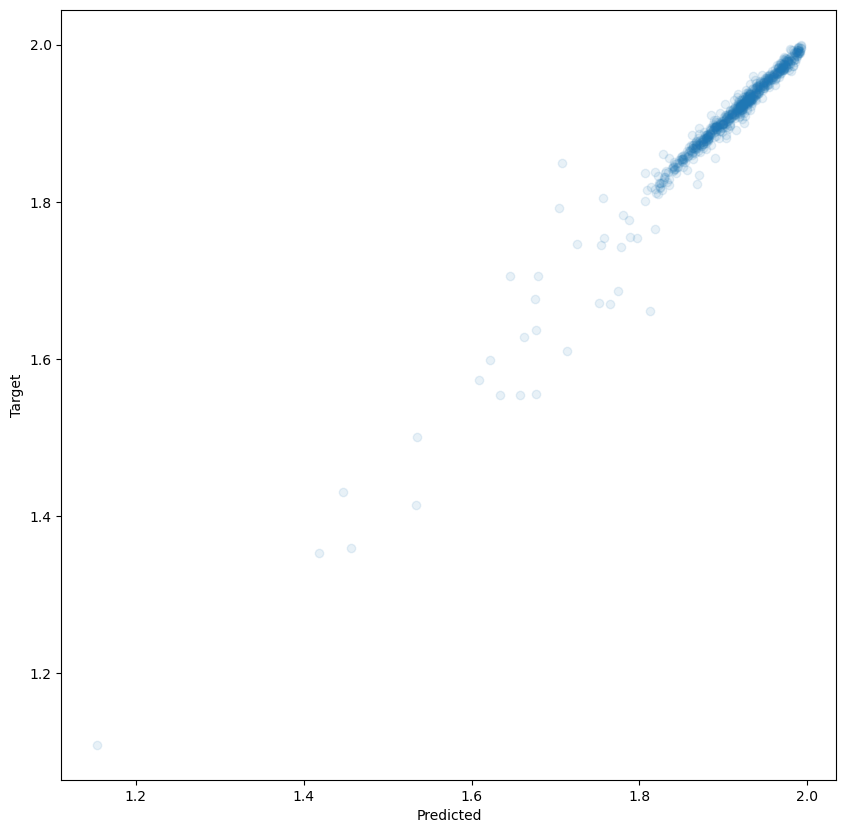

In [ ]:
preds = outputs.preds["binding"]
tgts = outputs.targets["binding"]
mask = tgts != dataset.numerical_pad_token_id
preds = preds[mask]
tgts = tgts[mask]

plt.figure(figsize=(10, 10))
plt.scatter(preds, tgts, alpha=0.1)
plt.xlabel("Predicted")
plt.ylabel("Target")
plt.show()


In [ ]:
from kbgen.utils import TensorDict, like
from torch import nn
from typing import Tuple


class HybridDiffusion:
    def __init__(self, model: nn.Module, config: dict) -> None:
        self.config = config
        self.model = model

    def _backward_diffusion_step(
        self,
        x: TensorDict,
        kpm: TensorDict,        # key padding mask needed for text fields
        mask: torch.Tensor,     # property mask
        leaps: int = 1,         # number of steps to leap (properties to flip)
        undo: bool = False,     # whether to re-evaluate previous flips
        temperature: float = 1, # temperature for sampling
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        # mask is bool type
        new_mask = self._flip_n_mask(mask.clone(), backward=True, flips=leaps, dtype=torch.bool)
        if undo:
            # if undo, we allow resampling of previously unmasked elements
            diff_mask = new_mask
        else:
            diff_mask = new_mask ^ mask
        # This is where hybrid changes, sample numerical fields with Gaussian
        output = self.model(x, kpm, property_mask=self._bool_mask_to_float(diff_mask))
        for idx, field in enumerate(self.fields.all_fields):
            update_mask = diff_mask[:, idx]
            new_samples = self._sample_with_temp(output[field], temperature, field)
            # HACK due to categoricals being tokenized in the input but not output
            if field in self.fields["categorical"]:
                new_samples = self.categorical_id_to_token(field, new_samples.long())
                new_samples = new_samples.to(x[field].device)
            new_samples = like(new_samples, x[field])
            x[field][update_mask] = new_samples[update_mask]
        return x, new_mask

    def _sample_with_temp(self, logits, temp, field):
        """Sample from a batch of logits with temperature."""
        if field in self.fields["numerical"]:
            return logits + torch.randn_like(logits) * temp * 0.01
        if temp == 0:
            return logits.argmax(-1)
        else:
            proba = logits / temp
            return torch.multinomial(proba, 1).view(-1)

    def _get_empty_input(self, batch_size: int) -> TensorDict:
        out = {}
        for field in self.fields.all_fields:
            shape = (batch_size, *self.input_shapes[field])
            if field in self.fields["numerical"]:
                out[field] = torch.zeros(*shape, dtype=torch.float)
            elif field in self.fields["categorical"]:
                out[field] = torch.zeros(*shape).long()
            elif field in self.fields["text"]:
                out[field] = torch.zeros(*shape).long()
        return TensorDict(out, fields=self.fields)

    def generate_sample(
        self,
        n=1,
        cond=None,
        kpm=None,
        mask=None,
        leaps: int = 1,
        undo: bool = False,
        temperature: float = 1,
    ):
        device = next(self.model.parameters()).device
        if cond is None:
            cond = self._get_empty_input(n).to(device)
            mask = torch.zeros(n, self.numel, dtype=torch.bool, device=device)
            kpm = self._get_empty_input(n).float_().to(device)
        self.model.eval()
        with torch.no_grad():
            while not mask.all():
                cond, mask = self._backward_diffusion_step(
                    cond, kpm, mask, leaps=leaps, undo=undo, temperature=temperature
                )
        return cond